In [1]:
# OPTIONAL: Load the "autoreload" eX_orig[alias]tension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.config import get_interim_dir
from src.config import get_hussmann_supplementary_xlsx, HOME_PATH, FILTER_COUNT, METHOD, SAMPLE, PROFILE_TYPE

In [3]:
sns.set_theme(style="white", palette="muted")

In [4]:
print(FILTER_COUNT, METHOD, PROFILE_TYPE)

aliases = ["MB0{}".format(i) for i in range(1, 7)]

data = {}
for alias in aliases:
    X = pd.read_pickle(get_interim_dir() + "{}_gRNAwise_reduced_repair_outcome_profiles.{}.pkl".format(alias, FILTER_COUNT))
    data[alias] = (X == 0).sum()

700 robust_cov paired-replicates


In [5]:
plot_d = pd.concat(data).rename(index={
    "Homology Directed Repair": "Homology directed repair",
    "Any Insertion": "Any insertion",
}).reset_index().rename(columns={"level_0": "Replicate", 0: "Number of barcodes with zero counts", "lumc_category": "Mutation Category"})
plot_d["Replicate"] = plot_d["Replicate"].map({
    'MB01': 'Replicate 1 (Target Site 1)', 
    'MB02': 'Replicate 2 (Target Site 1)', 
    'MB03': 'Replicate 3 (Target Site 2)', 
    'MB04': 'Replicate 4 (Target Site 2)', 
    'MB05': 'Replicate 5 (Target Site 3)', 
    'MB06': 'Replicate 6 (Target Site 3)'
})

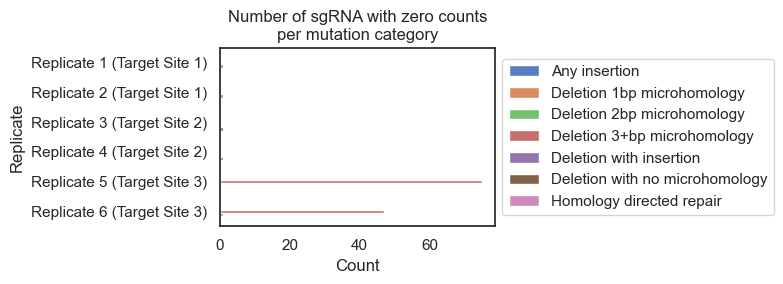

In [6]:
fig = plt.figure(figsize=(8, 3))
ax = fig.subplots()

plot_d.loc[plot_d["Mutation Category"] ==  "Deletion 0bp microhomology", "Mutation Category"] = "Deletion with no microhomology"
plot_d = plot_d.sort_values(by=["Mutation Category", "Replicate"])

sns.barplot(data=plot_d, y="Replicate", x="Number of barcodes with zero counts", hue="Mutation Category", ax=ax)
plt.title("Number of sgRNA with zero counts\nper mutation category")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.xlabel("Count")
plt.savefig("artifacts/fig_supplementary_1a.pdf")
plt.savefig("artifacts/fig_supplementary_1a.png")